<a href="https://colab.research.google.com/github/DataEtnos/estudos_python/blob/main/Estudo_de_datas_de_acidentes_a%C3%A9reos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact

import pandas as pd




##TRATAMENTO DE DATA



Para que o Python/Pandas reconheça que estamos trabalhando com o tipo de dado no formato data (`date` ou `datetime`), precisamos especificar este formato, para que assim possamos usufruir das diversas funções que lidam com este tipo de dado.

Para mostrar como podemos fazer essa conversão em uma tabela, iremos utilizar como exemplo dados de acidentes aéreos, neste momento selecionando apenas as colunas de data, que por padrão é lida como texto, e das fatalidades:

In [65]:
#Chamando o data set e especofocando a coluna que vamos utilizar , separando ela do data set
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities']).dropna()
print(df.shape)
df.head()


(5256, 2)


,Date,Fatalities
0,09/17/1908,1.0
1,07/12/1912,5.0
2,08/06/1913,1.0
3,09/09/1913,14.0
4,10/17/1913,30.0


In [66]:
# Formatando data automaticamente ao ler tabela e conferindo o  tipo de dados data tem que ficar no formato data time
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities'], parse_dates=['Date']).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5256 non-null   datetime64[ns]
 1   Fatalities  5256 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 123.2 KB


In [67]:
df.head()

,Date,Fatalities
0,1908-09-17,1.0
1,1912-07-12,5.0
2,1913-08-06,1.0
3,1913-09-09,14.0
4,1913-10-17,30.0


In [68]:
# Podemos permitir que o pandas infira automaticamente o formato da data se possível (padrão do Pandas)
# pd.to_datetime(df.Date)
df['Date'].astype('datetime64[ns]')

0      1908-09-17
1      1912-07-12
2      1913-08-06
3      1913-09-09
4      1913-10-17
          ...    
5263   2009-05-20
5264   2009-05-26
5265   2009-06-01
5266   2009-06-07
5267   2009-06-08
Name: Date, Length: 5256, dtype: datetime64[ns]

In [69]:
df.head()

,Date,Fatalities
0,1908-09-17,1.0
1,1912-07-12,5.0
2,1913-08-06,1.0
3,1913-09-09,14.0
4,1913-10-17,30.0


In [70]:
# Especificando o formato (para dataset grande costuma ser inclusive mais rápido)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5256 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5256 non-null   datetime64[ns]
 1   Fatalities  5256 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 123.2 KB


In [71]:
df.head()

,Date,Fatalities
0,1908-09-17,1.0
1,1912-07-12,5.0
2,1913-08-06,1.0
3,1913-09-09,14.0
4,1913-10-17,30.0


Observe que podemos permitir ou não que o pandas faça a inferência do formato da data, contudo, é uma boa prática que especifiquemos o formato sempre que possível. Inclusive, para um grande volume de dados a conversão com espefificação tende a ser mais rápida.

Todos os símbolos dos formatos podem ser encontrados [neste link da documentação oficial do Python](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).


Uma vez que a coluna de data esteja no formato certo, podemos utilizar o método `dt` do Pandas para acessar muitas funcionalidades úteis das datas/horários. Vide conjunto de funcionalidades na [documentação oficial](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html).

In [72]:
print(df['Date'].dt.day_of_week)

0       3
1       4
2       2
3       1
4       4
       ..
5263    2
5264    1
5265    0
5266    6
5267    0
Name: Date, Length: 5256, dtype: int64


In [73]:
# Adicionando a data como index e ordenando-as
df_index = df.set_index('Date').sort_index()
df_index


,Fatalities
Date,
1908-09-17,1.0
1912-07-12,5.0
1913-08-06,1.0
1913-09-09,14.0
1913-10-17,30.0
...,...
2009-05-20,98.0
2009-05-26,4.0
2009-06-01,228.0


In [74]:
# Filtrando do ano 2000 até o mês de maio de 2005
df_index.loc['2000-05-10':'2003-08']

,Fatalities
Date,
2000-05-10,6.0
2000-05-17,3.0
2000-05-21,19.0
2000-05-25,1.0
2000-05-25,1.0
...,...
2003-08-04,2.0
2003-08-08,1.0
2003-08-20,20.0


In [75]:
# Agrupando por ano e somando as fatalidades
df_index.resample('YS').sum()

,Fatalities
Date,
1908-01-01,1.0
1909-01-01,0.0
1910-01-01,0.0
1911-01-01,0.0
1912-01-01,5.0
...,...
2005-01-01,1306.0
2006-01-01,1136.0
2007-01-01,931.0


In [76]:
df = pd.read_csv('https://query.data.world/s/2gfb7bmzhna6kcbpc7admwa6cexprz', usecols=['Date','Fatalities'], parse_dates=['Date'], index_col='Date')
df_monthly = df.resample('M').sum().sort_index()
df_monthly.head()

,Fatalities
Date,
1908-09-30,1.0
1908-10-31,0.0
1908-11-30,0.0
1908-12-31,0.0
1909-01-31,0.0


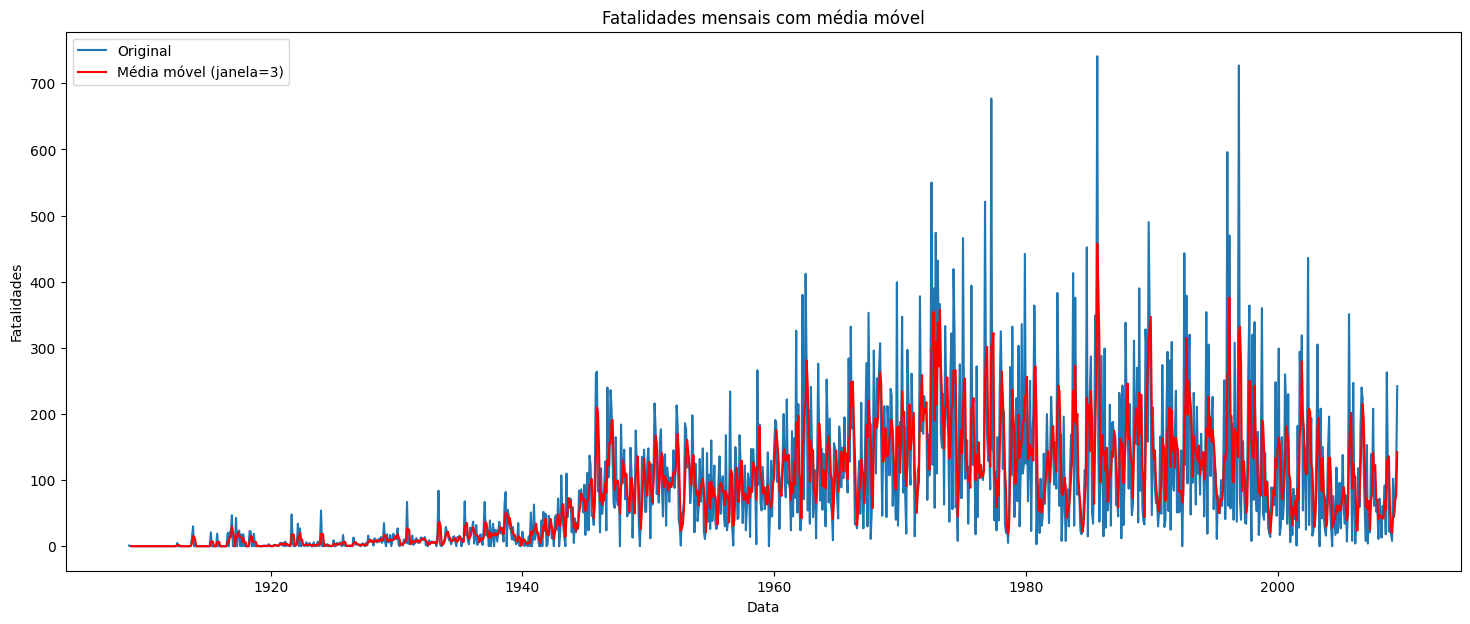

In [77]:
# Plot sem tratamento de ruídos com rolling filter
rolling_avg = df_monthly.Fatalities.rolling(window=3).mean()

plt.figure(figsize=(18,7))
plt.plot(df_monthly.index, df_monthly.Fatalities, label='Original')
plt.plot(df_monthly.index, rolling_avg, color='red', label='Média móvel (janela=3)')
plt.xlabel('Data')
plt.ylabel('Fatalidades')
plt.title('Fatalidades mensais com média móvel')
plt.legend()
plt.show()

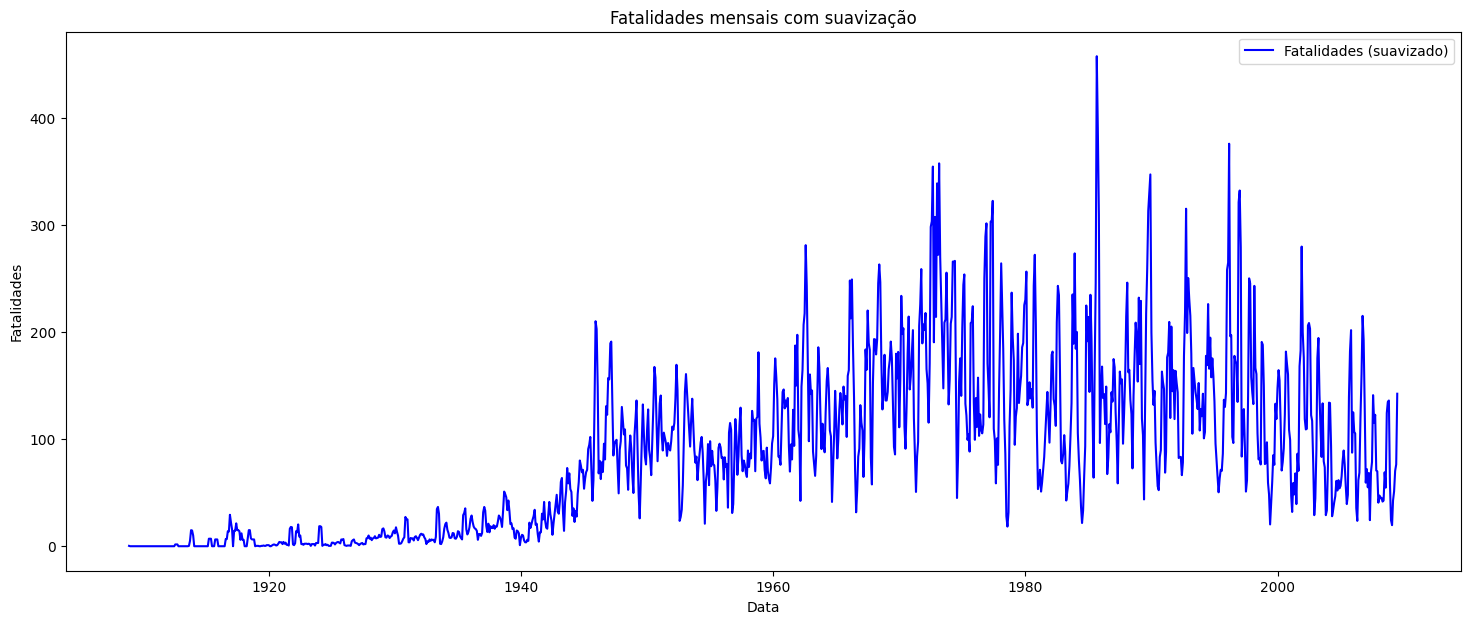

In [78]:
plt.figure(figsize=(18,7))
plt.plot(df_monthly.index, rolling_avg, color='blue', label='Fatalidades (suavizado)')
plt.xlabel('Data')
plt.ylabel('Fatalidades')
plt.title('Fatalidades mensais com suavização')
plt.legend()
plt.show()

## Média móvel

A média móvel é formada através do somatório de um conjunto de valores numéricos dividido pela quantidade de elementos somados.
As médias móveis são definidas pela quantidade de períodos incluídos no cálculo. Normalmente usa-se uma quantidade de períodos menor em conjunto com outra de maior quantidade de períodos

In [79]:
df_monthly.Fatalities.rolling(3).mean()

Date
1908-09-30           NaN
1908-10-31           NaN
1908-11-30      0.333333
1908-12-31      0.000000
1909-01-31      0.000000
                 ...    
2009-02-28     42.666667
2009-03-31     51.333333
2009-04-30     70.333333
2009-05-31     76.333333
2009-06-30    142.333333
Freq: M, Name: Fatalities, Length: 1210, dtype: float64

interactive(children=(IntSlider(value=60, description='window_size', max=121, min=12, step=12), Output()), _do…

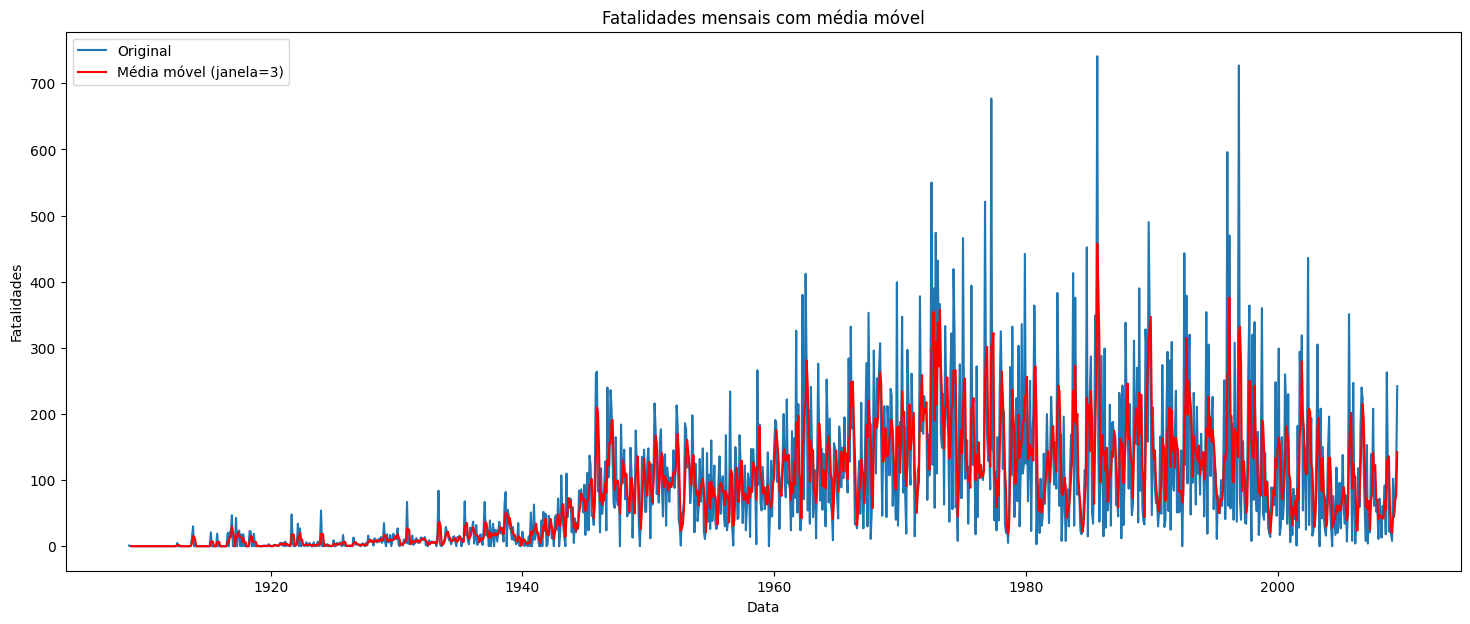

In [86]:
@interact(window_size=(12,121,12))
def rolling_mean(window_size):
 rolling_avg = df_monthly.Fatalities.rolling(window=120).mean()

plt.figure(figsize=(18,7))
plt.plot(df_monthly.index, df_monthly.Fatalities, label='Original')
plt.plot(df_monthly.index, rolling_avg, color='red', label='Média móvel (janela=3)')
plt.xlabel('Data')
plt.ylabel('Fatalidades')
plt.title('Fatalidades mensais com média móvel')
plt.legend()
plt.show()